# KNN for Diabetes

Predict if a person gets infected by diabetes

Use the Diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read dataset

In [2]:
diabetes = pd.read_csv("./data/diabetes.csv")

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [9]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # if this value is equal 0, then the person is dead

for column in zero_not_accepted:
    diabetes[column] = diabetes[column].replace(0, np.NaN)
    mean = int(diabetes[column].mean(skipna=True))
    diabetes[column] = diabetes[column].replace(np.NaN, mean)

#### **Visualization**

##### **Pairplot**

<Figure size 720x504 with 0 Axes>

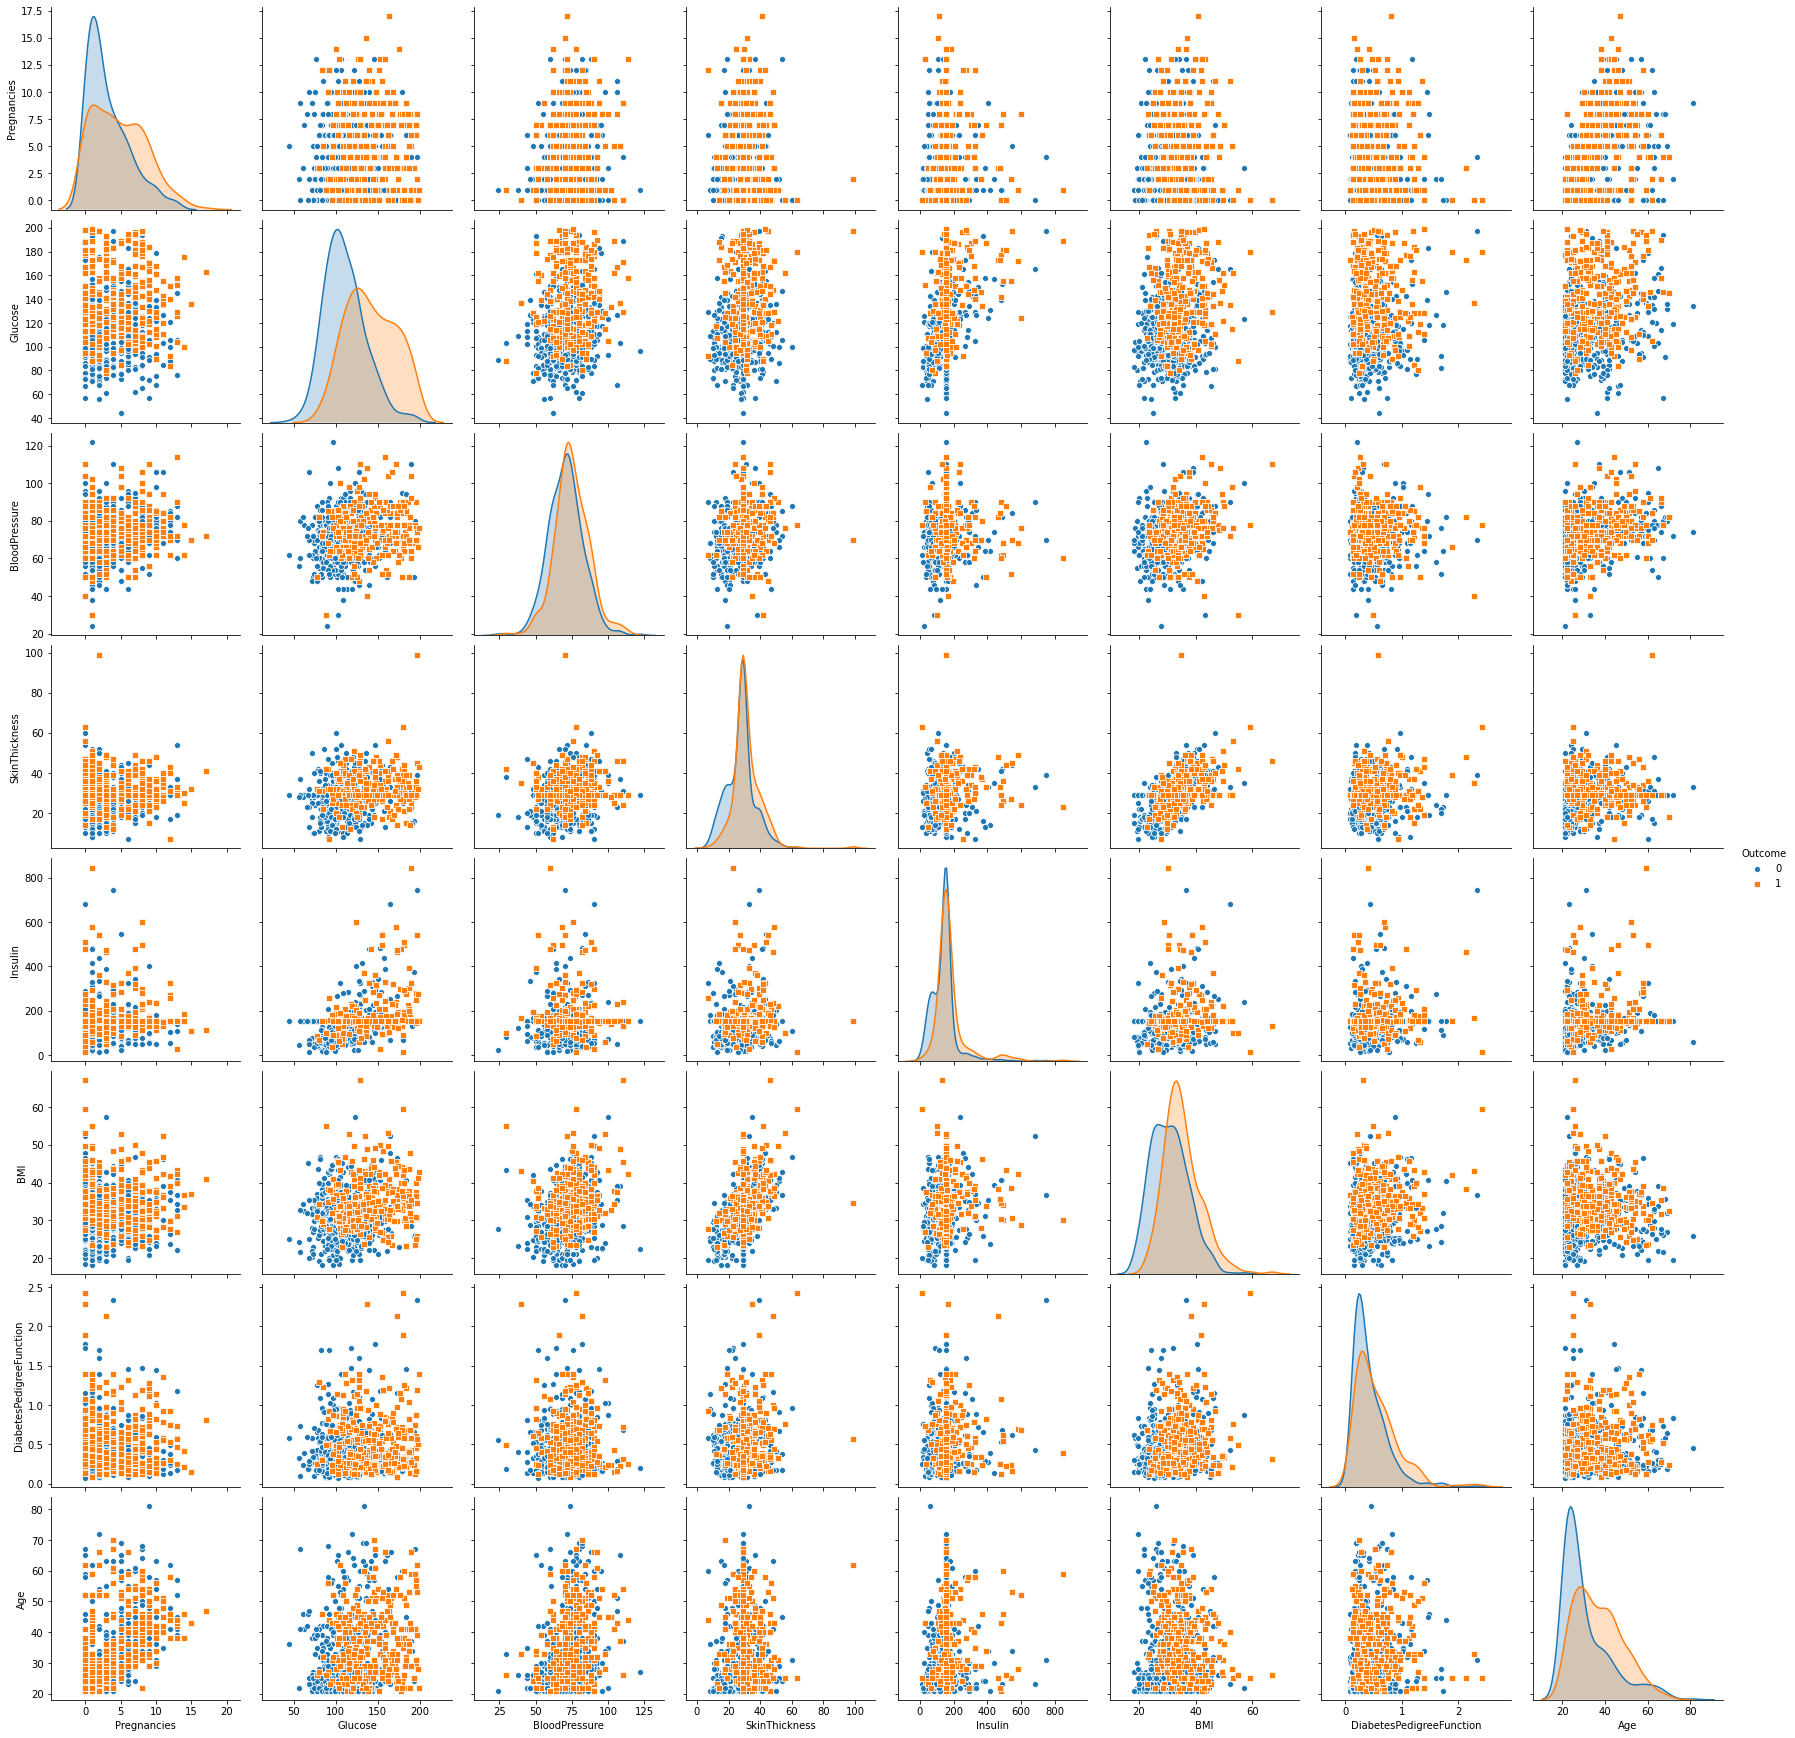

In [10]:
plt.figure(figsize=[10, 7])
# I want to see the effect of all attribute in this table which lead to the diabetes
sns.pairplot(data=diabetes, hue='Outcome', height=3, markers=['o', 's'])
# No need to drop anything
# sns.pairplot(diabetes.drop('Age', axis=1), hue ='Outcome', height=3, markers=['o', 's'])



#### **Boxplots**

C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239126F9788>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

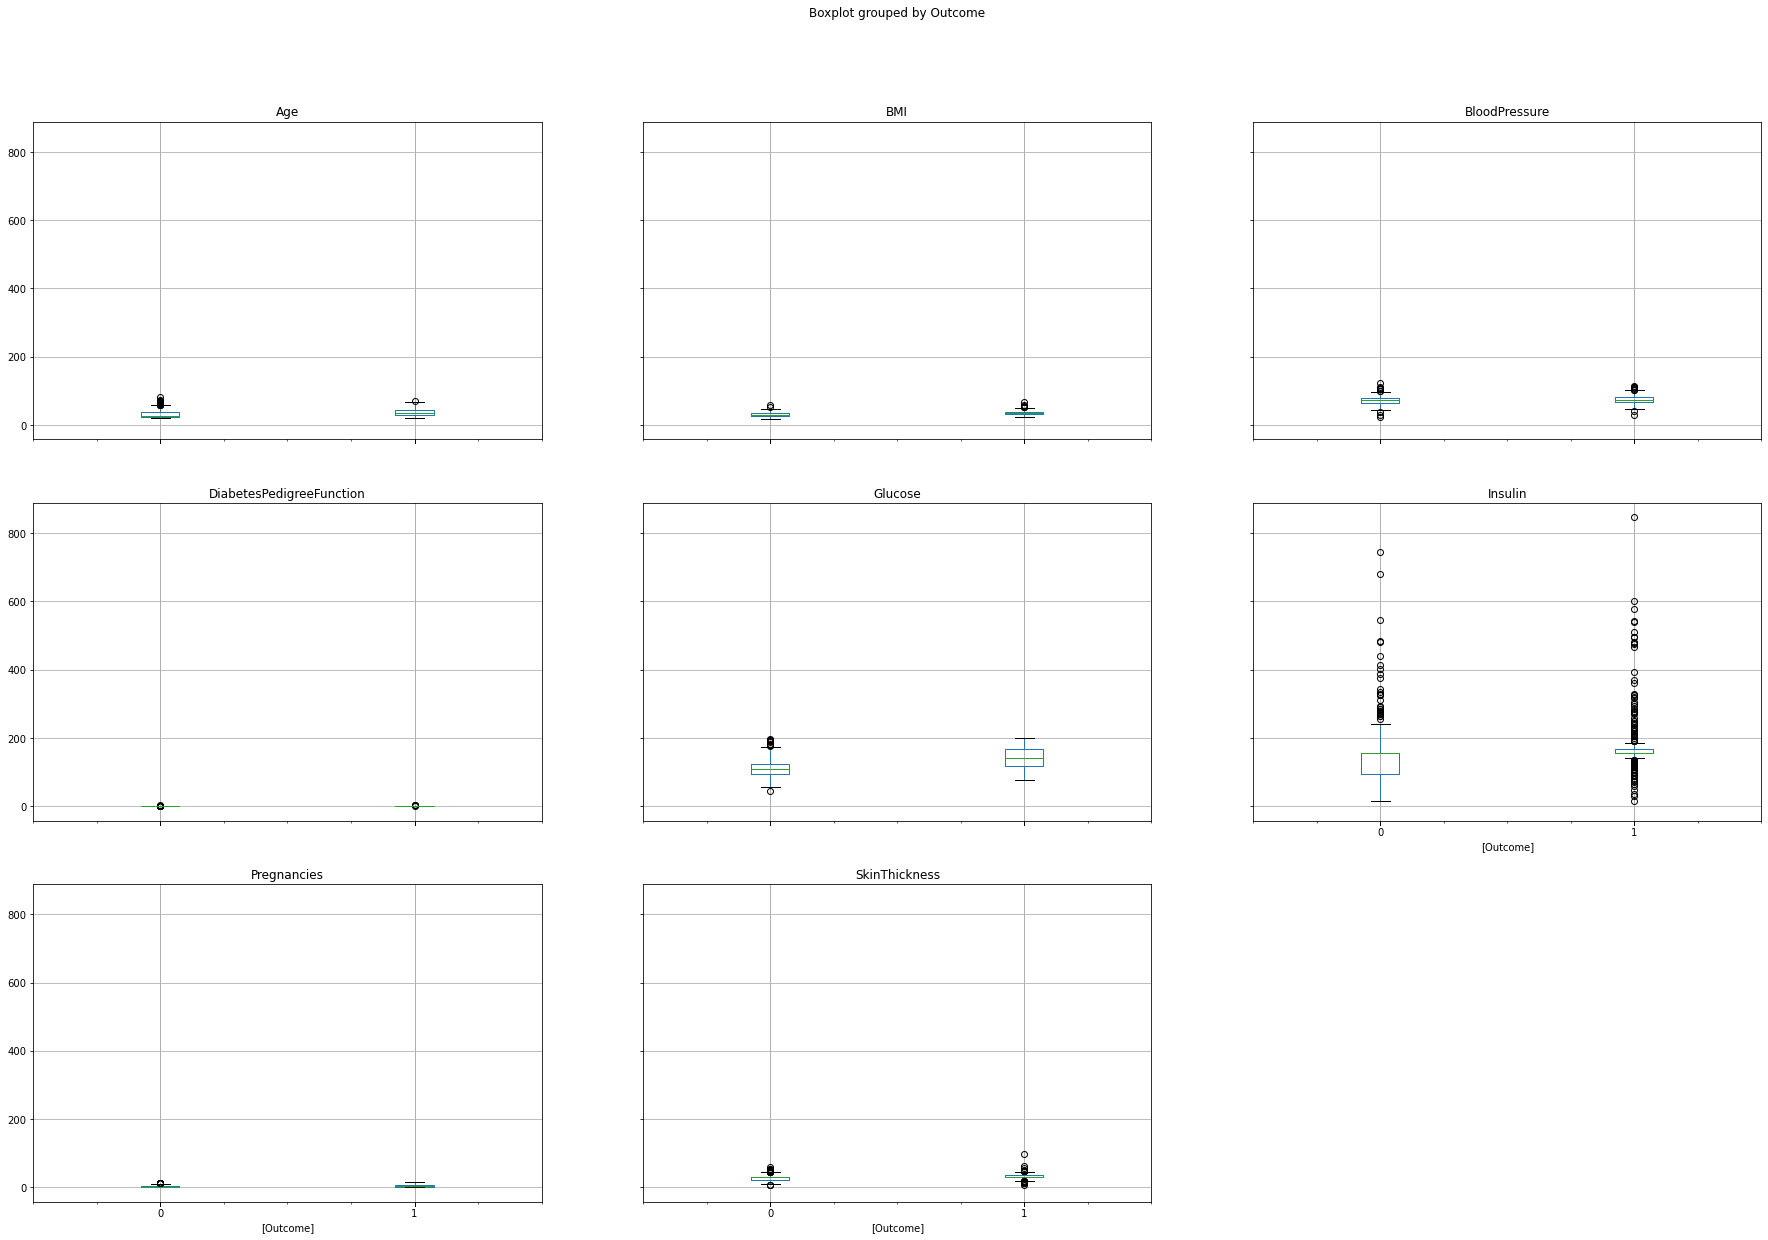

In [11]:
plt.figure()
diabetes.boxplot(by='Outcome', figsize=(30, 20))

### 2. Data preprocessing 

#### **Define Features and Label**

In [12]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_columns].values
y = diabetes['Outcome'].values 

##### **Encoding** (not need in this case; do it because we are in practice mode)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

##### **Splitting dataset into train set and test set**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape

(614, 8)

In [16]:
y_train.shape

(614,)

In [17]:
X_test.shape

(154, 8)

In [18]:
y_test.shape

(154,)

### 3. Using KMM for classification

##### **Create model**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

##### **Find the best k value**

In [20]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

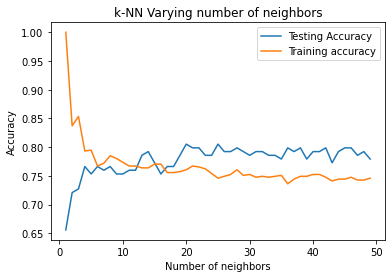

Max element from Numpy Array :  0.8051948051948052
Returned tuple of arrays : (array([19, 24], dtype=int64),)
List of Indices of maximum element : [19 24]


In [21]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# Get the maximum element from a Numpy array
maxElement = np.amax(test_accuracy)
print('Max element from Numpy Array : ', maxElement)
# Get the indices of maximum element in numpy array
result = np.where(test_accuracy == np.amax(test_accuracy))
print('Returned tuple of arrays :', result)
print('List of Indices of maximum element :', result[0])


##### **Choose k = 20**

In [22]:
# Create model (k = 20)
classifier = KNeighborsClassifier(n_neighbors=20)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

##### **Prediction**

In [23]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

##### **Evaluating the model for the test set**

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 12],
       [18, 29]], dtype=int64)

In [25]:
cm1 = pd.DataFrame(data=cm, index=['non-diabetic', 'diabetic'], columns=['non-diabetic ', 'diabetic'])
cm1

,non-diabetic,diabetic
non-diabetic,95,12
diabetic,18,29


##### **Accuracy**

##### **Method 1:**

In [26]:
#Using accuracy_score
accuracy = accuracy_score(y_test, y_pred, normalize=True)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 80.52 %.


##### **Method 2:**

In [27]:
def sumAll(confusionMatrix):
    return sum(sum(confusionMatrix.tolist(), []))
    
def sumMainDiagonal(confusionMatrix):
    return sum(confusionMatrix[i][i] for i in range(len(confusionMatrix)))

sumAll(cm)
sumMainDiagonal(cm)
accuracy_byhand = sumMainDiagonal(cm) / sumAll(cm)

accuracy_byhand * 100

80.51948051948052

##### **Method 3:**

In [28]:
classifier.score(X_test, y_test)

0.8051948051948052

### Output Visualization

### Testing

In [29]:
predict_output = pd.DataFrame(data=[y_test, y_pred], index=['y_test', 'y_pred'])

In [30]:
predict_output.transpose().head(20)

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [31]:
# pred
predict_output.iloc[0,:].value_counts()

0    107
1     47
Name: y_test, dtype: int64

In [32]:
# y_test
predict_output.iloc[1,:].value_counts()

0    113
1     41
Name: y_pred, dtype: int64